**Outline:**

1. [Libraries and settings](#1-bullet)
2. [Train and Evaluate Model](#2-bullet)
3. [Predictions](#3-bullet)

## 1. [Libraries and settings](#1-bullet)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3320 entries, 0 to 3319
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         3320 non-null   float64
 1   High         3320 non-null   float64
 2   Low          3320 non-null   float64
 3   Close        3320 non-null   float64
 4   Volume       3204 non-null   float64
 5   TradingDate  3320 non-null   object 
 6   Code         3320 non-null   object 
dtypes: float64(5), object(2)
memory usage: 207.5+ KB


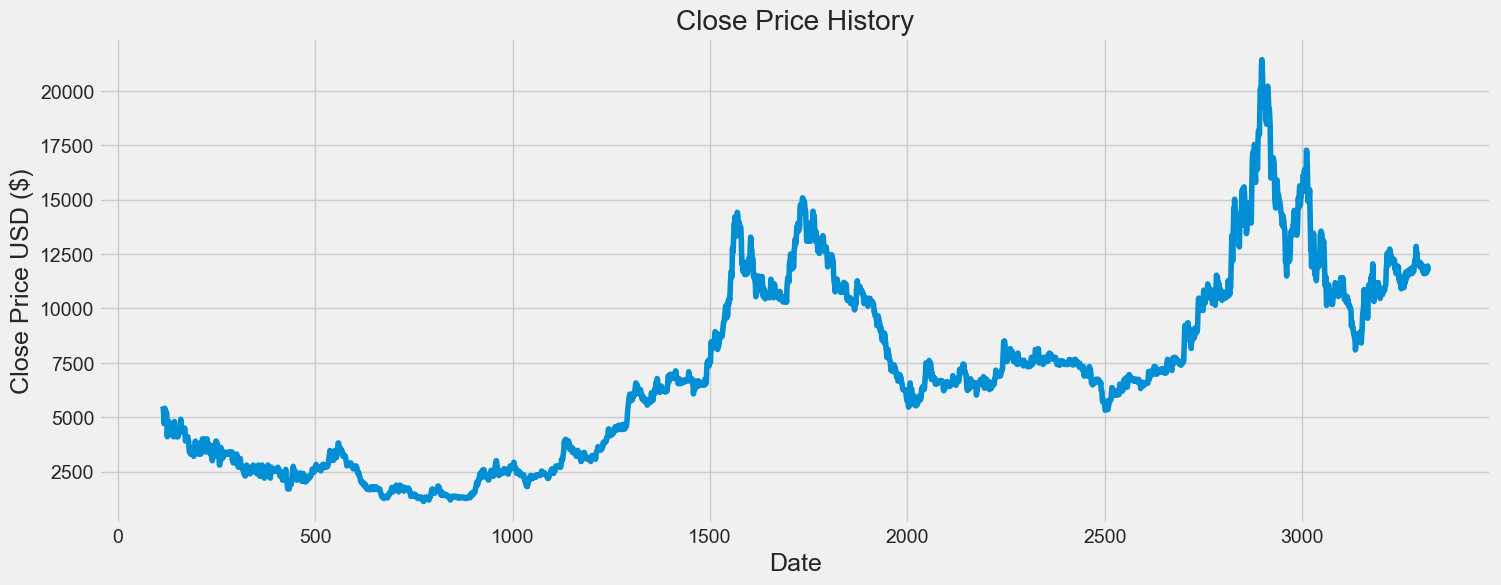

In [ ]:
from DataPreprocessing import *

<class 'pandas.core.frame.DataFrame'>
Index: 3500 entries, 0 to 3499
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         3500 non-null   float64
 1   High         3500 non-null   float64
 2   Low          3500 non-null   float64
 3   Close        3500 non-null   float64
 4   Volume       3500 non-null   int64  
 5   TradingDate  3500 non-null   object 
 6   Code         3500 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 218.8+ KB


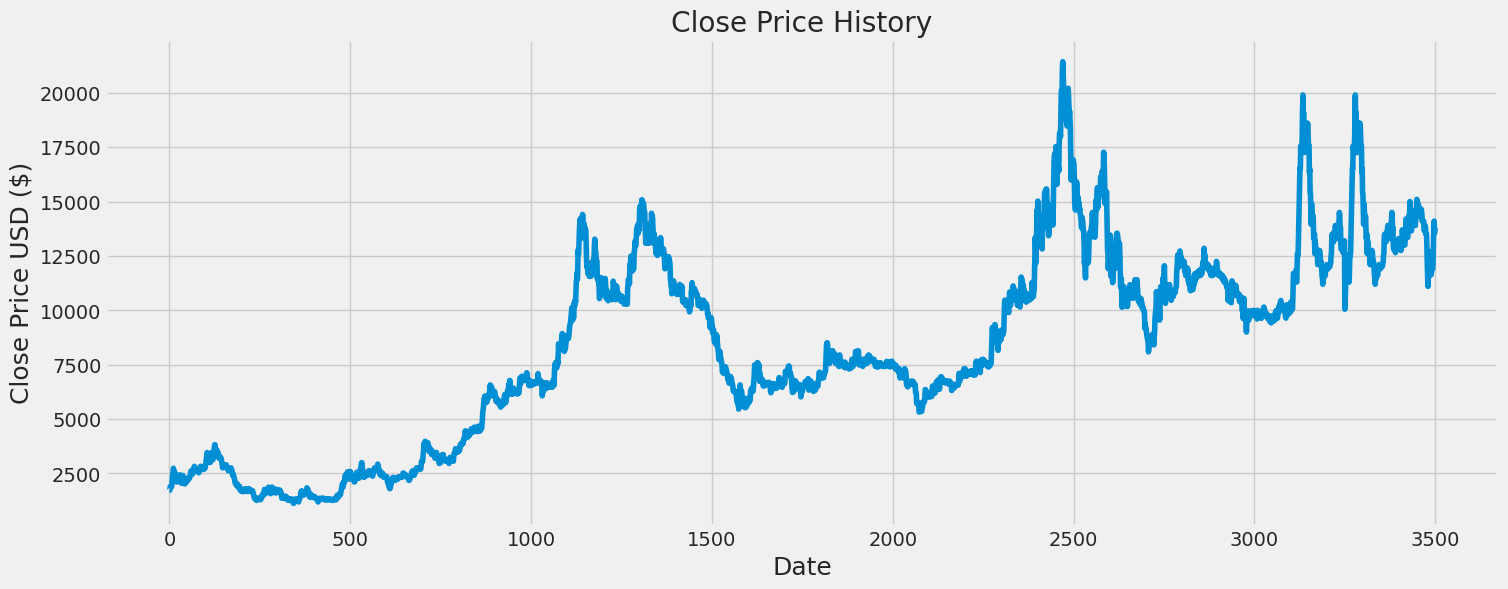

array([[-1.49710513],
       [-1.49710513],
       [-1.46046397],
       ...,
       [ 1.33571394],
       [ 1.20975998],
       [ 1.26701178]])

In [2]:
#!/usr/bin/env python
# coding: utf-8

# ## Import Libraries

# In[1]:


import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime as dt

from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import learning_curve, train_test_split

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from tqdm import tqdm

import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
get_ipython().run_line_magic('matplotlib', 'inline')

import warnings
warnings.filterwarnings("ignore")


# ## Load dataset

# In[2]:


df = pd.read_csv('/content/drive/MyDrive/VietFinanceLab-Analyzing-Market-Trends-and-Forecasting-Future-Price/Dataset/technology/ITD.csv', sep='\t', index_col=0)


# In[3]:


df.head()


# In[4]:


df.info()


# In[5]:


df.describe()


# ## Data Cleaning

# In[6]:


df['TradingDate'] = pd.to_datetime(df['TradingDate'], format='%Y-%m-%d')


# In[7]:


df = df.dropna()


# ## Data Visualization

# In[8]:


plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


# ## Manipulate data

# In[9]:


# Create a new dataframe
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values


# In[10]:


# scaler = MinMaxScaler(feature_range=(0,1))
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

scaled_data


# In[ ]:






In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. [Train and Evaluate Model](#2-bullet)

### Create dataset

In [3]:
time_step = 30

In [4]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [5]:
x_for_train, y_for_train = create_dataset(scaled_data, time_step)

x_for_train =x_for_train.reshape(x_for_train.shape[0],x_for_train.shape[1])
y_for_train = y_for_train.reshape(y_for_train.shape[0],1)

In [6]:
training_size=int(len(dataset)*0.8)
test_size=len(dataset)-training_size
train_data,test_data=scaled_data[0:training_size],scaled_data[training_size:len(dataset)]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (2800, 1)
test_data:  (700, 1)


In [7]:
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

x_train =x_train.reshape(x_train.shape[0],x_train.shape[1])
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1])
y_train = y_train.reshape(y_train.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)


print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_test: ", x_test.shape)
print("y_test", y_test.shape)

x_train:  (2769, 30)
y_train:  (2769, 1)
x_test:  (669, 30)
y_test (669, 1)


### Building model

Using best hyperparameters after tuning to retrain model

In [8]:
# Create and train the SVR model
eval_set = [(x_test, y_test)]
XgB_model = XGBRegressor(learning_rate= 0.01, max_depth = 10, n_estimators = 500)
XgB_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [9]:
predictions = XgB_model.predict(x_test)
predictions = predictions.reshape(-1,1)

predictions_train = XgB_model.predict(x_train)
predictions_train = predictions_train.reshape(-1,1)

In [10]:
predictions = scaler.inverse_transform(predictions)
predictions_train = scaler.inverse_transform(predictions_train)
y_test = scaler.inverse_transform(y_test)
y_train = scaler.inverse_transform(y_train)

In [11]:
column_names_pred = ['Close_predict']
df_predictions = pd.DataFrame(predictions, columns=column_names_pred)

column_names_test = ['Close_test']
df_test = pd.DataFrame(y_test, columns=column_names_test)

concatenated = np.concatenate([df_predictions, df_test], axis=1)
column_names_concat = ['Close_predict', 'Close_test']
df_concatenated = pd.DataFrame(concatenated, columns = column_names_concat)

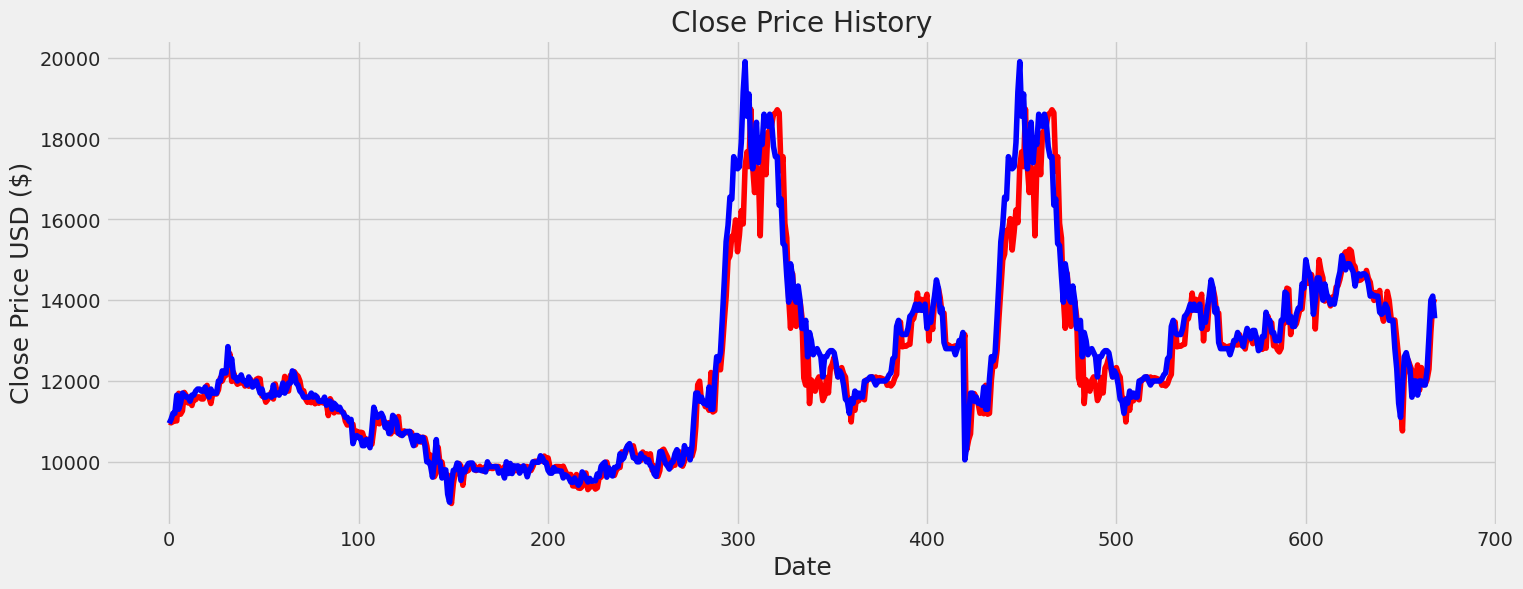

In [12]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df_predictions['Close_predict'], color='red', label='Predicted Close Price')
plt.plot(df_test['Close_test'], color='blue', label='Actual Close Price')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

### Evaluate model

In [13]:
predictions = scaler.fit_transform(predictions)
predictions_train = scaler.fit_transform(predictions_train)
y_test = scaler.fit_transform(y_test)
y_train = scaler.fit_transform(y_train)

In [14]:

mae_train = mean_absolute_error(y_train, predictions_train)
rmse_train = mean_squared_error(y_train, predictions_train)
r2_train = r2_score(y_train, predictions_train)

print("Train Mean Absolute Error:", mae_train)
print("Train Mean Squared Error:", rmse_train)
print("Train R-squared:", r2_train)

Train Mean Absolute Error: 0.008652520949810267
Train Mean Squared Error: 0.00016722548576570523
Train R-squared: 0.9998327745142342


In [15]:
mae_test = mean_absolute_error(y_test, predictions)
rmse_test = mean_squared_error(y_test, predictions)
r2_test = r2_score(y_test, predictions)

print("Test Mean Absolute Error:", mae_test)
print("Test Mean Squared Error:", rmse_test)
print("Test R-squared:", r2_test)

Test Mean Absolute Error: 0.16305951580900493
Test Mean Squared Error: 0.06765242352158458
Test R-squared: 0.9323475764784154


## 3. [Predictions](#3-bullet)

In [16]:
predictions = scaler.inverse_transform(predictions)
predictions_train = scaler.inverse_transform(predictions_train)
y_test = scaler.inverse_transform(y_test)
y_train = scaler.inverse_transform(y_train)

In [17]:
last_60_days = np.array([y_test[i] for i in range(-1, -61, -1)])
next_days = []
for i in range(60):
    input_data = x_test[i-60].reshape(-1,30)

    predicted_price = XgB_model.predict(input_data)
    next_days.append(predicted_price)

#
# pop_price = next_days.pop(0)
print("Predicted prices for the next days:")

for i, price in enumerate(next_days):
    price = scaler.inverse_transform(price.reshape(-1,1))
    print(f"Day {i+1}: {price}")

next_days = scaler.inverse_transform(np.array(next_days).reshape(-1,1))

Predicted prices for the next days:
Day 1: [[13246.906]]
Day 2: [[12698.819]]
Day 3: [[12791.88]]
Day 4: [[12763.486]]
Day 5: [[12586.179]]
Day 6: [[12795.303]]
Day 7: [[12735.03]]
Day 8: [[13027.94]]
Day 9: [[13060.086]]
Day 10: [[13208.121]]
Day 11: [[13425.634]]
Day 12: [[13784.246]]
Day 13: [[13853.638]]
Day 14: [[13587.185]]
Day 15: [[13915.458]]
Day 16: [[13871.996]]
Day 17: [[13570.438]]
Day 18: [[13505.921]]
Day 19: [[13202.548]]
Day 20: [[13183.066]]
Day 21: [[13194.633]]
Day 22: [[13243.524]]
Day 23: [[13257.111]]
Day 24: [[13418.635]]
Day 25: [[13235.544]]
Day 26: [[13143.383]]
Day 27: [[12847.993]]
Day 28: [[12715.179]]
Day 29: [[12900.905]]
Day 30: [[12812.768]]
Day 31: [[12948.608]]
Day 32: [[12408.794]]
Day 33: [[12227.15]]
Day 34: [[12471.072]]
Day 35: [[12925.31]]
Day 36: [[12713.727]]
Day 37: [[12302.839]]
Day 38: [[12212.576]]
Day 39: [[12254.193]]
Day 40: [[11816.868]]
Day 41: [[11368.397]]
Day 42: [[10233.918]]
Day 43: [[9651.955]]
Day 44: [[10968.866]]
Day 45: [[1

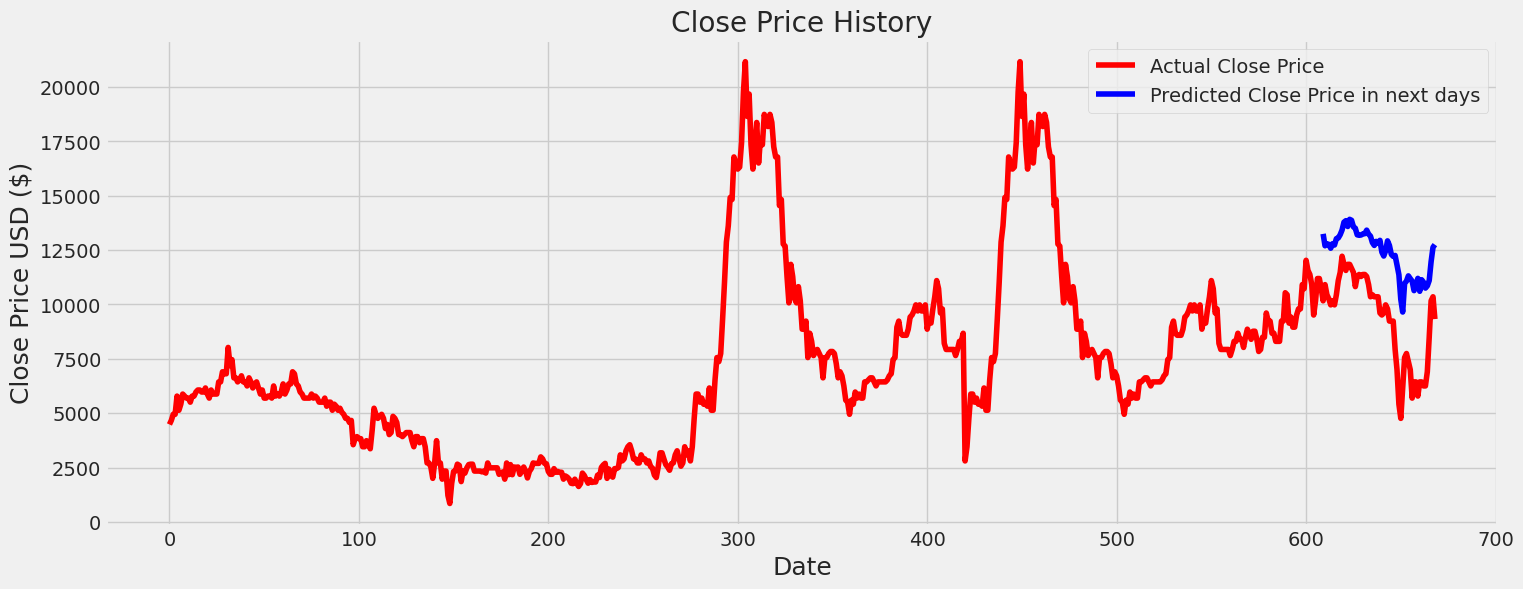

In [18]:
plt.figure(figsize=(16, 6))
plt.title('Close Price History')
plt.plot(y_test[:], color='red', label='Actual Close Price')
plt.plot(range(len(y_test)-60, len(y_test)), next_days, color='blue', label='Predicted Close Price in next days')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()